## Import Library



In [131]:
!pip install split-folders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

import zipfile,os
import splitfolders
import numpy as np
from google.colab import files
from keras.preprocessing import image
import keras

## Getting Dataset

In [2]:
#mengambil dataset rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-11 09:49:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   938KB/s    in 4m 46s  

2021-05-11 09:54:40 (1.08 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir("/tmp/rockpaperscissors")#list dari directory

['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

## Splitting

In [5]:
#menyimpan path
base_dir = "/tmp/images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")

#pembagian ukuran validation seusai dengan ketentuan pengerjaan
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 422,
                   ratio=(.6,.4), group_prefix= None)

#dir utk train & val
train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 3908.84 files/s]


## Image Augmentation

In [6]:
#proses augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical') 
        
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')
        


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Model With MobileNetv2

In [112]:
# from keras.applications.mobilenet_v2 import MobileNetV2

In [139]:

# model = keras.models.Sequential()
# model.add(MobileNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3)))
# model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(521, activation='relu'))
# model.add(tf.keras.layers.Dense(3, activation='softmax'))
# model.summary()


## Basic Model Building




In [155]:
#model building

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),#Dropout Regularization layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [133]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Callback Function 

In [156]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("Akurasi Diatas 97%")
      self.model.stop_training = True

In [157]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,  
      epochs=50,
      validation_data=validation_generator, 
      validation_steps=5,
      callbacks=[CustomCallback()],  
     )

Epoch 1/50
30/30 [==============================] - 2s 43ms/step - loss: 1.1524 - accuracy: 0.3178 - val_loss: 1.1175 - val_accuracy: 0.2000
Epoch 2/50
30/30 [==============================] - 1s 38ms/step - loss: 1.0965 - accuracy: 0.3824 - val_loss: 1.0945 - val_accuracy: 0.3500
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 1.0930 - accuracy: 0.3087 - val_loss: 1.1001 - val_accuracy: 0.3000
Epoch 4/50
30/30 [==============================] - 1s 37ms/step - loss: 1.1011 - accuracy: 0.3673 - val_loss: 1.0935 - val_accuracy: 0.3000
Epoch 5/50
30/30 [==============================] - 1s 37ms/step - loss: 1.0848 - accuracy: 0.4489 - val_loss: 1.0410 - val_accuracy: 0.6500
Epoch 6/50
30/30 [==============================] - 1s 37ms/step - loss: 1.0629 - accuracy: 0.5034 - val_loss: 0.8375 - val_accuracy: 0.7000
Epoch 7/50
30/30 [==============================] - 1s 37ms/step - loss: 0.8130 - accuracy: 0.7217 - val_loss: 0.5006 - val_accuracy: 0.9000
Epoch 8/50
30

## Plotting Loss and Accuracy



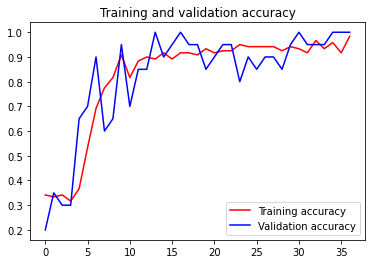

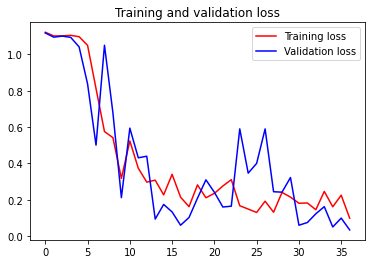

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

## Upload Image

In [151]:
##function untuk memperoleh nama kelas
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S (2).png
{'paper': 0, 'rock': 1, 'scissors': 2}
scissors
Hasil Prediksi: scissors


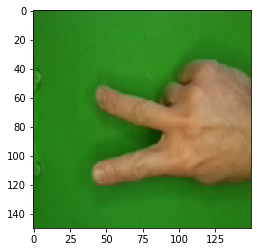

In [152]:
uploaded = files.upload()
print(train_generator.class_indices) 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predicted_index = np.argmax(classes)
  print(get_class_string_from_index(predicted_index))
  print("Hasil Prediksi: " + get_class_string_from_index(predicted_index))
  

<p>Nama : Wilbert Hartono Yudith</p>
<p>Asal : Sumatera Utara, Kota medan</p>